# The Mann-Whitney-Wilcoxon estimator for the ROC AUC

Recall that the ROC AUC of a scoring function $f$ is  defined as

$$A := \mathbb P(f(X) \geq f(X') | Y=1, Y'=0).$$

Here, $(X,Y)$ are jointly distributed with $Y$ taking values in $\{0,1\}$. 

The ROC AUC can be estimated via the Mann–Whitney–Wilcoxon statistic

$$\boxed{\hat A = \frac{1}{n_0 n_1} \sum_{i=1}^{n_1} \sum_{j=1}^{n_0} 1_{P_i \geq Q_j}}$$

where $P_i$ refers to the score of a point in class 1, and $Q_j$ of one in class 0: 

$$P_i \equiv f(X_i)|Y_i=1,\qquad Q_j \equiv f(X_j)|Y_j=0$$

We will often omit the limits of the sums whenever they are obvious from the context.

It is easily seen that $\mathbb E[\hat A] = A$, and thus one might ask what is the variance of this estimator. We will prove the following result (eq. (2) of [1] and eq. (6) of [2]):

**Theorem**. Under tha hypothesis that all points in a given class are independent (ie. $P$'s are iid among themselves, as are the $Q$') then the variance of the Mann-Whitney-Wilcoxon statistic is

$$\boxed{\mathrm{Var}\; \hat A = \frac{A(1-A) + (n_0 - 1)(P_{XYY} - A^2) + (n_1 - 1)(P_{XXY} - A^2)}{n_0 n_1},}$$

where 

$$P_{XXY} = \mathbb P (P \geq Q, P' \geq Q)$$

for any $P, P'$, and similarly 

$$P_{XYY} = \mathbb P(P \geq Q, P \geq Q')$$

for any $Q, Q'$.

## Proof:

In what follows, $1_{ij} \equiv 1_{P_i \geq Q_j}$ will be a shorthand notation.

By definition,

$$\begin{align*}
\mathrm{Var}\, (n_0 n_1 \hat A) &= \mathrm{Var}\, \left( \sum_{ij} 1_{ij}, \sum_{kl} 1_{kl} \right)\\
&= \sum_{ij} \sum_{kl} \mathrm{cov}\,(1_{ij}, 1_{kl})\\
&= \sum_{ij} \sum_{kl} \mathrm{cov}\,(1_{ij}, 1_{kl}) \left[ 1_{i=k\\ j= l} + 1_{i=k\\ j \neq l}+ 1_{i\neq k\\ j= l}+ 1_{i\neq k\\ j \neq l} \right]\\
&= \sum_{ij} \mathrm{Var} (1_{ij}) + \sum_i \sum_{j\neq l} \mathrm{cov}\,(1_{ij}, 1_{il}) + \sum_j \sum_{i\neq k} \mathrm{cov}\,(1_{ij}, 1_{kj}) + \sum_{i\neq k} \sum_{j\neq l} \mathrm{cov}\,(1_{ij}, 1_{kl})
\end{align*}$$

Now, we can simplify a bit by noting that 

$$\begin{align*}
\mathrm{cov}\,(1_{ij}, 1_{kl}) &\equiv \mathbb E[1_{ij} 1_{kl}] - \mathbb E[1_{ij}] \mathbb E[1_{kl}]\\
&= \mathbb E[1_{ij, kl}] - A^2
\end{align*}
$$

where $1_{ij, kl}$ denotes $1_{P_i\geq Q_j, P_k \geq Q_l}$ and we see the AUC $A$ appear since $\mathbb E[1_{ij}] = \mathbb E[1_{P_i \geq Q_j}] = \mathbb P(P_i \geq Q_j) = A$.

Hence,

$$\begin{align*}
n_0^2 n_1^2 \mathrm{Var}\, \hat A =  \sum_{ij} \mathrm{Var} (1_{ij}) +
    \sum_i \sum_{j\neq l} \left( \mathbb E[1_{ij, il}] - A^2 \right) +
    \sum_j \sum_{i\neq k} \left( \mathbb E[1_{ij, kj}] - A^2 \right) + 
    \sum_{i \neq k} \sum_{j\neq l} \left( \mathbb E[1_{ij, kl}] - A^2 \right)
\end{align*}$$

Now, the summand in the last term is (explicitly) $\mathbb E[1_{P_i \geq Q_j, P_k \geq Q_l}]$. But since $i\neq k$ and $j \neq l$, the events $P_i \geq Q_j$ is completely independent from $P_k \geq Q_l$, and we can split the expectation into $\mathbb E[1_{P_i \geq Q_j}] \mathbb E[1_{P_k \geq Q_l}] = A^2$, which cancels the other $A^2$ term. 

Furthermore, it is easy to see that the term $\mathbb E[1_{ij, il}]$ is exactly the $P_{XYY}$ term defined above: it is the probability that a single score in class 1 ($P_i$) is greater than two random scores from class 0 ($Q_j$ and $Q_l$). An analogous reasoning shows that $\mathbb E[1_{ij, jk}] = \mathbb P_{XXY}$.

Putting these together, we are left with

$$\begin{align*}
 \mathrm{Var}\, \hat A =  \frac{1}{n_0^2 n_1^2} \left[
 \sum_{ij} \mathrm{Var} (1_{ij}) +
    \sum_i \sum_{j\neq l} \left( P_{XYY} - A^2 \right) +
    \sum_j \sum_{i\neq k} \left( P_{XXY} - A^2 \right) 
 \right] \qquad (*)
\end{align*}$$

To go further, we need an intermediate result:

**Lemma 1**: $\boxed{\mathrm{Var}\, 1_{P\geq Q} = A(1-A)}$

*Proof*: we will need the expression for conditional variance: if $X, Y$ are random variables,

$$\mathrm{Var}\, X = \mathbb E[\mathrm{Var}\,(X|Y)] + \mathrm{Var}\,(\mathbb E[X|Y])$$

For any $P$ and $Q$, it then follows that

$$\mathrm{Var}\, 1_{P \geq Q} = \mathbb E[\mathrm{Var}\,(1_{P \geq Q}|Q)] + \mathrm{Var}\,(\mathbb E[1_{P\geq Q}|Q])$$

Now, it is not too hard to see how the variable $1_{P\geq Q}|Q$ is distributed. Since it takes values on $\{0,1\}$ is is in the Bernoulli familly; recall that $X \sim \mathrm{Bernoulli}(p)$ means that $\mathbb P(X=1) = 1-\mathbb P(X=0) = p$. In our case,

$$\begin{align*}
\mathbb P(1_{P\geq Q} = 1|Q) &= \mathbb P(P \geq Q|Q)\\
&= 1 - \mathbb P(P \leq Q|Q)\\
&\equiv 1 - F_P(Q)
\end{align*}$$

where $F_P$ is the CDF of $P$. Hence, 

$$1_{P\geq Q}|Q \,\sim\,\mathrm{Bernoulli}(1 - F_P(Q))$$

Now, a $\mathrm{Bernoulli}(p)$ variable has expectation $p$ and variance $p(1-p)$. It follows that

$$\mathbb E[1_{P\geq Q}|Q] = 1 - F_P(Q),\qquad \mathrm{Var}\, (1_{P\geq Q}|Q) = F_P(Q) (1 - F_P(Q))$$

and plugging these into the original expression for the variance we get

$$\begin{align*}
\mathrm{Var}\, 1_{P \geq Q} &= \mathbb E[\mathrm{Var}\,(1_{P \geq Q}|Q)] + \mathrm{Var}\,(\mathbb E[1_{P\geq Q}|Q])\\
&= \mathbb E[F_P(Q) (1 - F_P(Q))] + \mathrm{Var}\,(1 - F_P(Q))\\
&= \mathbb E[F_P(Q)] - \mathbb E[F_P^2(Q)] + \mathrm{Var}\,(F_P(Q));\qquad \mbox{ but } \mathrm{Var}\, X = \mathbb E[X^2] - \mathbb E[X]^2\\
&= \mathbb E[F_P(Q)] - \mathbb E[F_P^2(Q)] + \mathbb E[F_P^2(Q)]  - (\mathbb E[F_P(Q)])^2\\
&= \mathbb E[F_P(Q)] (1 - \mathbb E[F_P(Q)])
\end{align*}$$

How much is $\mathbb E[F_P(Q)]$? This is indeed $\mathbb E_Q[F_P(Q)]$; let $f_P, f_Q$ denote the respective PDFs of $P$ and $Q$. Then

$$\begin{align*}
\mathbb E[F_P(Q)] &= \int_0^1 F_P(q) f_Q(q) dq\\
&= \int_0^1 dq\;f_Q(q)  \int_0^q dp \;f_P(p)\\
&= \int_{[0,1]^2} f_P(p) f_Q(q) 1_{p \leq q}\, dp dq\\
&= \mathbb E[1_{P\leq Q}] = 1 - \mathbb P(P\geq Q)\\
&= 1- A.
\end{align*}$$

Finally, 
$$\mathrm{Var}\, 1_{P \geq Q} = A(1-A)\qquad \Box$$

> This means that, for any $i,j$, $\mathrm{Var}\, 1_{ij} = A(1-A). Thus the first term above will be simplified.

Using this result in $(*)$ we get

$$\begin{align*}
 \mathrm{Var}\, \hat A =  \frac{1}{n_0^2 n_1^2} \left[
 \sum_{ij} A(1-A) +
    \sum_i \sum_{j\neq l} \left( P_{XYY} - A^2 \right) +
    \sum_j \sum_{i\neq k} \left( P_{XXY} - A^2 \right) 
 \right], 
\end{align*}$$

or, writing the sums explicitly,

$$\begin{align*}
 \mathrm{Var}\, \hat A =  \frac{1}{n_0^2 n_1^2} \left[
 \sum_{i=1}^{n_1} \sum_{j=1}^{n_0} A(1-A) +
    \sum_{i=1}^{n_1} \sum_{j=1}^{n_0} \sum_{l=1\\ l \neq j}^{n_0} \left( P_{XYY} - A^2 \right) +
    \sum_{j=1}^{n_0} \sum_{i=1}^{n_1} \sum_{k =1\\k\neq i}^{n_1} \left( P_{XXY} - A^2 \right) 
 \right], 
\end{align*}$$

None of the terms depend on the indices $i,j,k,l$ anymore. The first term will output a factor of $n_0 n_1$; the second one, $n_1 n_0 (n_0-1)$, and the third one $n_0 n_1 (n_1-1)$, hence

$$\mathrm{Var}\, \hat A = \frac{1}{n_0 n_1} \left[ A(1-A) + (n_0-1)(P_{XYY} - A^2) + (n_1 - 1)(P_{XXY} - A^2) \right]$$

as we wanted to prove. $\Box$

## Special case: random classifier

In the case of a random classifier, ie. where $P \sim \mathrm{Unif}([0,1])$ and similarly for $Q$, we have $A = 1/2$ and 

$$P_{XXY} = P_{YXX} = \frac 13,$$

since

$$\begin{align*} P_{XXY} &= \mathbb P(P_1 \geq Q, P_2 \geq Q)\\
&= \int_0^1 \mathbb P(P_1 \geq Q, P_2 \geq Q | Q=q) p(q) dq
\end{align*}$$

where $p(q) = 1$ is the uniform PDF. Now, conditioned on $Q$, the two events above are independent and we have

$$\begin{align*}
P_{XXY} &= \int_0^1 \mathbb P(P_1 \geq q) \mathbb P(P_2 \geq q) dq\\
&= \int_0^1 (1-q)^2 dq\\
&= \frac 13.
\end{align*}$$

Plugging this into the variance equation we get

$$\begin{align*}
(\mathrm{Var}\, \hat A)_\mathrm{random\, classifier} &= \frac{1}{n_0 n_1} \left[ \frac 14 + (n_0-1 + n_1-1) \left (\frac 13 - \frac 14\right)\right]\\
&= \frac{n_0+n_1+1}{12 n_0 n_1}
\end{align*}$$

If either $n_0$ or $n_1$ is sufficiently large, 

$$\boxed{\hat A _\mathrm{random\, classifier} \approx \mathcal N \left( \frac 12, \frac{n_0+n_1+1}{12 n_0 n_1}\right)}$$

(this result is eq. (3) of [2]). In particular, if $n_0 \to \infty$ and $n_1$ is kept fixed, we obtain the $1/12 n_1$ result we got from the Irwin-Hall distribution.

# Experimental test

Let us simulate a classification problem. We will:
* Train a model on a training set
* Create bootstrap samples of the test set and calculate the ROC AUC in each of them
* Use these samples to compare to the theoretical results

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [63]:
X, y = make_classification(n_samples=5000, weights=(0.7,), class_sep=0.8, flip_y=0.1, random_state=2 )

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [66]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

See if model is not too overfitted:

In [67]:
print("Train AUC:", round(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]),3))
print("Test AUC:", round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),3))

Train AUC: 0.876
Test AUC: 0.869


#### Use theoretical formulas

In [128]:
def calculate_pxxy(X, y, model, seed=None, n_samples=10000):
    # first score everyone
    scores = model.predict_proba(X)[:,1]
    
    p, q = scores[y==1], scores[y==0]
    
    if seed is not None:
        np.random.seed(seed)

    samples = [np.all(np.random.choice(p, size=2) >= np.random.choice(q, size=1)) for _ in range(n_samples)]
    return np.mean(samples)

def calculate_pxyy(X, y, model, seed=None, n_samples=10000):
    # first score everyone
    scores = model.predict_proba(X)[:,1]
    
    p, q = scores[y==1], scores[y==0]
    
    if seed is not None:
        np.random.seed(seed)

    samples = [np.all(np.random.choice(p, size=1) >= np.random.choice(q, size=2)) for _ in range(n_samples)]
    return np.mean(samples)

Theoretical variance:

In [129]:
pxxy = calculate_pxxy(X_test, y_test, model, seed=1)
pxxy

0.7883

In [130]:
pxyy = calculate_pxxy(X_test, y_test, model, seed=2)
pxyy

0.7857

In [134]:
A = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

In [132]:
n0, n1 = np.bincount(y_test)

In [133]:
def variance(n0, n1, A, pxxy, pxyy):
    return (1/(n0*n1)) * (A*(1-A) + (n0-1)*(pxyy-A**2) + (n1-1)*(pxxy - A**2))

In [137]:
theoretical_var = variance(n0, n1, A, pxxy, pxyy)
theoretical_var

7.212843682510507e-05

#### Use bootstrapping:

In [65]:
def bootstrap_X_y(X, y, seed=None):
    n = len(X)
    if seed is not None:
        np.random.seed(seed)
        
    indices = np.random.randint(0, high=len(X), size=len(X))
    return X[indices], y[indices]

In [70]:
n_samples = 10000
aucs = []
for seed in tqdm(range(n_samples)):
    X_bs, y_bs = bootstrap_X_y(X_test, y_test, seed=seed)
    auc = roc_auc_score(y_bs, model.predict_proba(X_bs)[:,1])
    aucs.append(auc)

  0%|          | 0/10000 [00:00<?, ?it/s]

Calculate variance:

In [138]:
exp_var = np.std(aucs)**2
exp_var

7.847175028444627e-05

In [140]:
#Comparison:
print("Theoretical variance:", round(theoretical_var,7))
print("Bootstrap variance:", round(exp_var,7))

Theoretical variance: 7.21e-05
Bootstrap variance: 7.85e-05


## Exponential modeling

In [142]:
scores = model.predict_proba(X_test)[:,1]

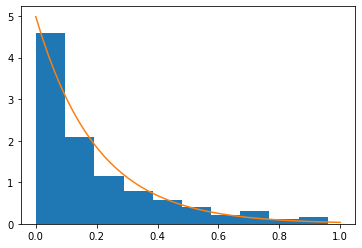

In [150]:
mu = 1/(scores[y_test==0].mean())
x = np.linspace(0,1)
plt.hist(scores[y_test==0], density=True)
plt.plot(x, mu * np.exp(-mu*x))
plt.show()

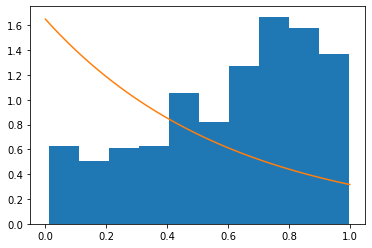

In [151]:
lamb = 1/(scores[y_test==1].mean())
x = np.linspace(0,1)
plt.hist(scores[y_test==1], density=True)
plt.plot(x, lamb * np.exp(-lamb*x))
plt.show()

## Particular results for Exponential distributions

In the case $P \sim \mathrm{Exp}(\lambda)$ and $Q \sim \mathrm{Exp}(\mu)$, we can easily show that

$$P_{XXY} = \frac{A}{2-A},\qquad P_{XYY} = \frac{2A^2}{1+A}$$

## References

[1] Cortes, Corinna and Mohri, Mehryar, *Confidence Intervals for the Area Under the ROC Curve*. Advances in Neural Information Processing Systems, 17 (2004).
Available at https://proceedings.neurips.cc/paper/2004/file/a7789ef88d599b8df86bbee632b2994d-Paper.pdf

[2] S. Shirahata, *Estimate of variance of Wilcoxon-Mann-Whitney statistic.* J. Japanese Soc. Comp. Statist. 6.2(1993), 1-10. Available at: https://www.jstage.jst.go.jp/article/jjscs1988/6/2/6_2_1/_pdf/-char/en
